In [2]:
import re
import emoji
import regex
import itertools
import nltk
from nltk.tokenize import word_tokenize, TweetTokenizer
import pandas as pd
import numpy as np
import pickle
import ast

In [3]:
with open('sorted_360_brand_list.pkl', 'rb') as f:
    all_brands = pickle.load(f)
with open('sorted_3748_inf_list.pkl', 'rb') as f:
    all_infs = pickle.load(f)
with open('category_list.pickle', 'rb') as f:
    category_list = pickle.load(f)

In [4]:
name_regex = "(?:^|[^\w])(?:@)([A-Za-z0-9_](?:(?:[A-Za-z0-9_]|(?:\.(?!\.))){0,28}(?:[A-Za-z0-9_]))?)"
hashtag_regex = "#(\w+)"

# 合併貼文 & extract # @

In [12]:
df = pd.read_excel(f"dataset_text/dataset_text/food_in_post_v1.xlsx")
inf_cols = list(df.columns)
inf_cols

['Brand',
 'Micro-influencer',
 'path1',
 'path2',
 'text',
 'timestamp',
 '#comments',
 '#likes']

In [13]:
all_inf_post = pd.DataFrame(columns=inf_cols)

In [14]:
for category in category_list:
    print(f"=============={category}=============")
    df = pd.read_excel(f"dataset_text/dataset_text/{category}_in_post_v1.xlsx")
    df["text"].fillna("", inplace=True)
    all_inf_post = pd.concat([all_inf_post, df], axis=0, ignore_index=True)

==============food=============
==============electronics=============
==============drink=============
==============airline=============
==============nonprofit=============
==============services=============
==============shoes=============
==============entertainment=============
==============clothing=============
==============makeup=============
==============jewelry=============
==============auto=============


In [15]:
len(all_inf_post)

227350

In [16]:
df = pd.read_excel(f"dataset_text/dataset_text/food_brand_post_v1.xlsx")
brand_cols = list(df.columns)
brand_cols

['Brand', 'path1', 'path2', 'text', 'timestamp', '#comments', '#likes']

In [17]:
all_brand_post = pd.DataFrame(columns=brand_cols)

In [18]:
for category in category_list:
    print(f"=============={category}=============")
    df = pd.read_excel(f"dataset_text/dataset_text/{category}_brand_post_v1.xlsx")
    df["text"].fillna("", inplace=True)
    all_brand_post = pd.concat([all_brand_post, df], axis=0, ignore_index=True)

==============food=============
==============electronics=============
==============drink=============
==============airline=============
==============nonprofit=============
==============services=============
==============shoes=============
==============entertainment=============
==============clothing=============
==============makeup=============
==============jewelry=============
==============auto=============


In [19]:
len(all_brand_post)

18000

In [20]:
def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if word in emoji.EMOJI_DATA:
            emoji_list.append(word)
    
    return emoji_list


In [21]:
def remove_emoji_from_row(row):
    emoji_list = []
    non_emoji_list = []
    data = regex.findall(r'\X', row)
    for word in data:
        if word in emoji.EMOJI_DATA:
            emoji_list.append(word)
        else:
            non_emoji_list.append(word)
    return ''.join(non_emoji_list)

In [23]:
def extract_feature(df, file_name, brand=False):
    
    df["text"].fillna("", inplace=True)
    df['mention'] = df['text'].str.findall(name_regex)
    df['hashtag'] = df['text'].str.findall(hashtag_regex)
    df['text'] = df['text'].str.replace('⠀','')
    df['emoji'] = df['text'].apply(split_count)
    
    # check the extracted emojis
    print(set(itertools.chain.from_iterable(df['emoji'].values)))
    
    # tokenize text only
    df['only_text'] = df['text'].replace(name_regex, '', regex = True)
    df['only_text'] = df['only_text'].replace(hashtag_regex, '', regex = True)
    df['only_text'] = df['only_text'].apply(remove_emoji_from_row)
#     df['tokenized_only_text'] = df['only_text'].apply(TT.tokenize)
    df['tokenized_only_text'] = df['only_text'].apply(word_tokenize)
    
    # count numbers
    df['#mentions'] = df['mention'].apply(lambda x: len(x))
    df['#hashtags'] = df['hashtag'].apply(lambda x: len(x))
    df['#emojis'] = df['emoji'].apply(lambda x: len(x))
    df['#caption_words'] = df['tokenized_only_text'].apply(lambda x: len(x))
    
    # save final df
#     if brand:
#         graph_feature = df[['Brand', '#likes', '#comments', '#hashtags', '#mentions', '#emojis', '#caption_words', 'timestamp']]
#     else:
#         graph_feature = df[['Brand', 'Micro-influencer', '#likes', '#comments', '#hashtags', '#mentions', '#emojis', '#caption_words', 'timestamp']]
#     graph_feature.to_csv(file_name, index=False)
    
    return df

    
    
    

In [ ]:
all_brand_post_new = extract_feature(all_brand_post, 'bb', True)

In [26]:
all_brand_post_new

,Brand,path1,path2,text,timestamp,#comments,#likes,mention,hashtag,emoji,only_text,tokenized_only_text,#mentions,#hashtags,#emojis,#caption_words
0,godiva,1,_0.jpg,godiva spiced chai hot chocolate: solving your...,1546717369,17,2178,[],[],[👆🏽],godiva spiced chai hot chocolate: solving your...,"[godiva, spiced, chai, hot, chocolate, :, solv...",0,0,1,20
1,godiva,1,_1.jpg,chocolate godiva parfait topped with chocolate...,1546617434,49,4628,[],[],[👆🏽],chocolate godiva parfait topped with chocolate...,"[chocolate, godiva, parfait, topped, with, cho...",0,0,1,17
2,godiva,10,_0.jpg,get a sweet start to the morning ☀️ light and ...,1533053180,24,2887,[],[],"[☀️, 🍫]",get a sweet start to the morning light and fl...,"[get, a, sweet, start, to, the, morning, light...",0,0,2,31
3,godiva,10,_1.jpg,our one-stop shop for all your chocolate cravi...,1532966456,31,3975,[aliajanel],[],"[😊, 🍫, 👆🏽]",our one-stop shop for all your chocolate cravi...,"[our, one-stop, shop, for, all, your, chocolat...",1,0,3,28
4,godiva,100,_1.jpg,repost: @peoplemag @peopleredcarpet our truffl...,1389587036,21,1310,"[peoplemag, peopleredcarpet, instylemagazine]",[goldenglobes],[],repost: our truffles are ready for the after ...,"[repost, :, our, truffles, are, ready, for, th...",3,1,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,wheelsperformance,12,_0.jpg,• please rate from 1-10! •\n\n#novitecrosso fe...,1479261494,3,754,"[novitecgroup, wheelsgram, wheelsgram]","[novitecrosso, wheels, wheelsp, ferrari, calif...",[],• please rate from 1-10! •\n\n ferrari califor...,"[•, please, rate, from, 1-10, !, •, ferrari, c...",3,7,0,24
17996,wheelsperformance,12,_1.jpg,"our client's @m6jay ""version 3.0"" 2016 bmw m6 ...",1478921505,12,1057,[m6jay],"[adv1, wheels, pirelli, pzero, tires, wheelsp,...",[],"our client's ""version 3.0"" 2016 bmw m6 f13 we ...","[our, client, 's, ``, version, 3.0, '', 2016, ...",1,17,0,30
17997,wheelsperformance,120,_0.jpg,alpha-n bmw m3 bt92 #wheels #wheelsp #wheelsgr...,1375192557,5,1996,[],"[wheels, wheelsp, wheelsgram, alphan, bt92, bm...",[],alpha-n bmw m3 bt92,"[alpha-n, bmw, m3, bt92]",0,26,0,4
17998,wheelsperformance,120,_1.jpg,ferrari f430 scuderia with #axiom #wheels #whe...,1375147402,13,2420,[],"[axiom, wheels, wheelsp, wheelsgram, axiomwhee...",[],ferrari f430 scuderia with ...,"[ferrari, f430, scuderia, with]",0,25,0,4


In [27]:
all_brand_post_new.to_csv('graph_feature/all_brand_post_extract.csv')

In [29]:
cnt = 0
for i in range(len(all_brand_post_new)):
    for ha in all_brand_post_new['hashtag'][i]:
        if ha.lower() != all_brand_post_new['Brand'][i].lower():
            if ha.lower() in all_brands or ha.lower() in all_infs:
                cnt += 1
cnt

523

In [ ]:
all_inf_post_new = extract_feature(all_inf_post, 'ii', False)

In [31]:
all_inf_post_new.head()

,Brand,Micro-influencer,path1,path2,text,timestamp,#comments,#likes,mention,hashtag,emoji,only_text,tokenized_only_text,#mentions,#hashtags,#emojis,#caption_words
0,godiva,atasteofkoko,1,_0.jpg,volcanic sunsets on the big island at @fshuala...,1549390802,22,726,"[fshualalai, readysetjetset]","[rsjsinhawaii, gohawaii, dametraveler, lethawa...",[〰️],volcanic sunsets on the big island at photogr...,"[volcanic, sunsets, on, the, big, island, at, ...",2,9,1,11
1,godiva,atasteofkoko,1,_1.jpg,camouflaged in the jungle #kokovisitshawaii\n\...,1549344603,84,1809,"[fshualalai, summersalt, readysetjetset]","[kokovisitshawaii, fshualalai, gosummersalt, r...","[〰️, 〰️, 〰️]",camouflaged in the jungle \n\n shot at \n wear...,"[camouflaged, in, the, jungle, shot, at, weari...",3,8,3,9
2,godiva,atasteofkoko,1,_2.jpg,bird's eye view of the freshest catch at @fshu...,1549308907,17,761,"[fshualalai, readysetjetset]","[fshualalai, kokovisitshawaii, rsjsinhawaii, e...",[],bird's eye view of the freshest catch at's ‘ul...,"[bird, 's, eye, view, of, the, freshest, catch...",2,6,0,41
3,godiva,atasteofkoko,1,_3.jpg,breakfast at the pool at @fshualalai that's wo...,1549166704,41,1173,"[fshualalai, summersalt, readysetjetset]","[kokovisitshawaii, gosummersalt, gohawaii, dam...",[],breakfast at the pool at that's worth waking u...,"[breakfast, at, the, pool, at, that, 's, worth...",3,9,0,22
4,godiva,atasteofkoko,1,_4.jpg,❤️i'm hosting a valentine's brunch with @aidss...,1549128640,29,841,"[aidsservicesaustin, shelbysorrel, hanks.austin]",[],[❤️],i'm hosting a valentine's brunch with & at on ...,"[i, 'm, hosting, a, valentine, 's, brunch, wit...",3,0,1,72


In [296]:
all_inf_post_new.to_csv('graph_feature/all_inf_post_extract.csv')

In [32]:
cnt = 0
for i in range(len(all_inf_post_new)):
    for ha in all_inf_post_new['hashtag'][i]:
        if ha.lower() != all_inf_post_new['Micro-influencer'][i].lower():
            if ha.lower() in all_brands or ha.lower() in all_infs:
                cnt += 1
cnt

20980

In [36]:
with open('train_test_split/train_brand_mention_brand.pickle', 'rb') as f:
    train_bmb = pickle.load(f)
with open('train_test_split/train_brand_mention_inf.pickle', 'rb') as f:
    train_bmi = pickle.load(f)
with open('train_test_split/train_inf_mention_brand.pickle', 'rb') as f:
    train_imb = pickle.load(f)
with open('train_test_split/train_inf_mention_inf.pickle', 'rb') as f:
    train_imi = pickle.load(f)

In [37]:
with open('train_test_split/test_brand_mention_brand.pickle', 'rb') as f:
    test_bmb = pickle.load(f)
with open('train_test_split/test_brand_mention_inf.pickle', 'rb') as f:
    test_bmi = pickle.load(f)
with open('train_test_split/test_inf_mention_brand.pickle', 'rb') as f:
    test_imb = pickle.load(f)
with open('train_test_split/test_inf_mention_inf.pickle', 'rb') as f:
    test_imi = pickle.load(f)

In [38]:
with open('discover_train_brand_index.pickle', 'rb') as f:
    train_brand_ids = pickle.load(f)
with open('discover_train_inf_index.pickle', 'rb') as f:
    train_inf_ids = pickle.load(f)
with open('discover_test_brand_index.pickle', 'rb') as f:
    test_brand_ids = pickle.load(f)
with open('discover_test_inf_index.pickle', 'rb') as f:
    test_inf_ids = pickle.load(f)

# 儲存帳號使用 hashtag

In [10]:
all_brand_post_new = pd.read_csv('graph_feature/all_brand_post_extract.csv', index_col=[0])

In [11]:
all_brand_post_new.head()

,Brand,path1,path2,text,timestamp,#comments,#likes,mention,hashtag,emoji,only_text,tokenized_only_text,#mentions,#hashtags,#emojis,#caption_words
0,godiva,1,_0.jpg,godiva spiced chai hot chocolate: solving your...,1546717369,17,2178,[],[],['👆🏽'],godiva spiced chai hot chocolate: solving your...,"['godiva', 'spiced', 'chai', 'hot', 'chocolate...",0,0,1,20
1,godiva,1,_1.jpg,chocolate godiva parfait topped with chocolate...,1546617434,49,4628,[],[],['👆🏽'],chocolate godiva parfait topped with chocolate...,"['chocolate', 'godiva', 'parfait', 'topped', '...",0,0,1,17
2,godiva,10,_0.jpg,get a sweet start to the morning ☀️ light and ...,1533053180,24,2887,[],[],"['☀️', '🍫']",get a sweet start to the morning light and fl...,"['get', 'a', 'sweet', 'start', 'to', 'the', 'm...",0,0,2,31
3,godiva,10,_1.jpg,our one-stop shop for all your chocolate cravi...,1532966456,31,3975,['aliajanel'],[],"['😊', '🍫', '👆🏽']",our one-stop shop for all your chocolate cravi...,"['our', 'one-stop', 'shop', 'for', 'all', 'you...",1,0,3,28
4,godiva,100,_1.jpg,repost: @peoplemag @peopleredcarpet our truffl...,1389587036,21,1310,"['peoplemag', 'peopleredcarpet', 'instylemagaz...",['goldenglobes'],[],repost: our truffles are ready for the after ...,"['repost', ':', 'our', 'truffles', 'are', 'rea...",3,1,0,10


In [13]:
all_brand_post_new['hashtag'] = all_brand_post_new['hashtag'].apply(ast.literal_eval)

In [15]:
brand_use_hashtags = dict()
for i in range(len(all_brand_post_new)):
    brand_name = all_brand_post_new['Brand'][i].lower()
    brand_id = all_brands.index(brand_name)
    hts = all_brand_post_new['hashtag'][i]
    if brand_id not in brand_use_hashtags:
        brand_use_hashtags[brand_id] = []
    brand_use_hashtags[brand_id] += hts

In [18]:
all_inf_post_new = pd.read_csv('graph_feature/all_inf_post_extract.csv', index_col=[0])
all_inf_post_new.head()

,Brand,Micro-influencer,path1,path2,text,timestamp,#comments,#likes,mention,hashtag,emoji,only_text,tokenized_only_text,#mentions,#hashtags,#emojis,#caption_words
0,godiva,atasteofkoko,1,_0.jpg,volcanic sunsets on the big island at @fshuala...,1549390802,22,726,"['fshualalai', 'readysetjetset']","['rsjsinhawaii', 'gohawaii', 'dametraveler', '...",['〰️'],volcanic sunsets on the big island at photogr...,"['volcanic', 'sunsets', 'on', 'the', 'big', 'i...",2,9,1,11
1,godiva,atasteofkoko,1,_1.jpg,camouflaged in the jungle #kokovisitshawaii\n\...,1549344603,84,1809,"['fshualalai', 'summersalt', 'readysetjetset']","['kokovisitshawaii', 'fshualalai', 'gosummersa...","['〰️', '〰️', '〰️']",camouflaged in the jungle \n\n shot at \n wear...,"['camouflaged', 'in', 'the', 'jungle', 'shot',...",3,8,3,9
2,godiva,atasteofkoko,1,_2.jpg,bird's eye view of the freshest catch at @fshu...,1549308907,17,761,"['fshualalai', 'readysetjetset']","['fshualalai', 'kokovisitshawaii', 'rsjsinhawa...",[],bird's eye view of the freshest catch at's ‘ul...,"['bird', ""'s"", 'eye', 'view', 'of', 'the', 'fr...",2,6,0,41
3,godiva,atasteofkoko,1,_3.jpg,breakfast at the pool at @fshualalai that's wo...,1549166704,41,1173,"['fshualalai', 'summersalt', 'readysetjetset']","['kokovisitshawaii', 'gosummersalt', 'gohawaii...",[],breakfast at the pool at that's worth waking u...,"['breakfast', 'at', 'the', 'pool', 'at', 'that...",3,9,0,22
4,godiva,atasteofkoko,1,_4.jpg,❤️i'm hosting a valentine's brunch with @aidss...,1549128640,29,841,"['aidsservicesaustin', 'shelbysorrel', 'hanks....",[],['❤️'],i'm hosting a valentine's brunch with & at on ...,"['i', ""'m"", 'hosting', 'a', 'valentine', ""'s"",...",3,0,1,72


In [19]:
all_inf_post_new['hashtag'] = all_inf_post_new['hashtag'].apply(ast.literal_eval)

In [21]:
inf_use_hashtags = dict()
for i in range(len(all_inf_post_new)):
    inf_name = all_inf_post_new['Micro-influencer'][i].lower()
    if inf_name not in all_infs:
        continue
    inf_id = all_infs.index(inf_name)
    hts = all_inf_post_new['hashtag'][i]
    if inf_id not in inf_use_hashtags:
        inf_use_hashtags[inf_id] = []
    inf_use_hashtags[inf_id] += hts

In [26]:
with open('hashtag/sorted_all_acc_hashtag_tf.pkl', 'rb') as f:
    sorted_all_acc_hashtag_tf = pickle.load(f)

In [28]:
with open('hashtag/brand_use_hashtags_dict.pkl', 'wb') as f:
    pickle.dump(brand_use_hashtags, f)
with open('hashtag/inf_use_hashtags_dict.pkl', 'wb') as f:
    pickle.dump(inf_use_hashtags, f)

## tf 高的 stopwords

In [140]:
sorted_inf_hashtag_tf = {k: v for k, v in sorted(inf_hashtag_tf.items(), key=lambda item: item[1], reverse=True)}


In [141]:
sorted_inf_hashtag_tf

{'makeup': 3396,
 'travel': 3253,
 'fashion': 3132,
 'love': 2938,
 'ootd': 2753,
 'anastasiabeverlyhills': 2453,
 'wakeupandmakeup': 2443,
 'hypebeast': 2423,
 'instagood': 2349,
 'hudabeauty': 2181,
 'repost': 2178,
 'nicekicks': 2153,
 'ad': 2140,
 'style': 2068,
 'beauty': 1986,
 'kicksonfire': 1963,
 'photography': 1950,
 'photooftheday': 1935,
 'picoftheday': 1726,
 'art': 1652,
 'beautifuldestinations': 1626,
 'aviation': 1600,
 'wdywt': 1412,
 'makeupartist': 1409,
 'nike': 1384,
 'artofvisuals': 1382,
 'tbt': 1369,
 'kickstagram': 1320,
 'london': 1257,
 'beautiful': 1254,
 'summer': 1242,
 'liketkit': 1239,
 'nyc': 1211,
 'avgeek': 1206,
 'igsneakercommunity': 1199,
 'moodygrams': 1188,
 'fashionblogger': 1185,
 'wanderlust': 1167,
 'jordandepot': 1167,
 'norvina': 1134,
 'makeuptutorial': 1125,
 'highsnobiety': 1125,
 'passionpassport': 1078,
 'nature': 1065,
 'sunset': 1053,
 'motd': 1044,
 'makeupaddict': 1035,
 'complexkicks': 1035,
 'design': 1027,
 'instadaily': 1024,
 

In [95]:
# with open('sorted_inf_hashtag_tf.pkl', 'wb') as f:
#     pickle.dump(sorted_inf_hashtag_tf, f)

anastasiabeverlyhills 是化妝品品牌, tbt 是回顧老照片, wdywt=what did you wear today, kickstagram 是跟鞋子相關的, liketkit 想知道這套, avgeek 航空迷, motd=makeup of the day, kotd=kick of the day穿什麼鞋, abh=actual bodily harm

In [ ]:
# 太長的也很難無意義重疊
for key, item in sorted_inf_hashtag_tf.items():
    if len(key) < 5 and len(key) > 2:
        print(key, item)

### 選一些又短又太常用的篩選掉

In [ ]:
high_tf_stopwords = ['love', 'repost', 'instagood', 'ad', 'photooftheday', 'picoftheday',\
                    'beautifuldestinations', 'art', 'tbt', 'summer', 'run', 'mua', 'fun', 'cute', 'shake',\
                    ]

In [104]:
for brand in all_brands:
    if 'fun' in brand:
        print(brand)

In [85]:
inf_hashtag_tf['coffee'], inf_hashtag_tf['water'], inf_hashtag_tf['nyc'], inf_hashtag_tf['disney']

(544, 294, 1320, 473)

In [ ]:
nouse_inf_hashtag = []
for key in inf_hashtag_tf:
    if inf_hashtag_tf[key] > 50 or len(key) < 3:
        nouse_inf_hashtag.append(key)
        print(key)

In [144]:
len(nouse_inf_hashtag)

4861

hashtag tf 大多集中在 0~10 次

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

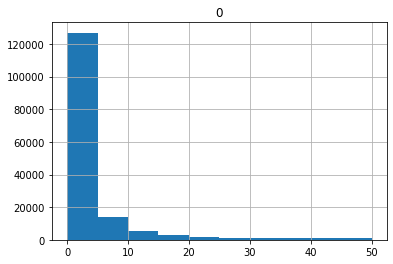

In [147]:
pd.DataFrame(inf_hashtag_tf.values()).hist(range=[0, 50])

# hashtag 被多少 inf 使用

In [225]:
hashtag_inf_used_only = dict()
for i in range(len(all_inf_post_new)):
    inf_name = all_inf_post_new['Micro-influencer'][i].lower()
    if inf_name not in all_infs:
        continue
    for ha in all_inf_post_new['hashtag'][i]:
        ha_l = ha.lower()
        if ha_l in stopwords:
            continue
#         if len(ha_l) <= 2:
#             continue
            
        if ha_l not in hashtag_inf_used_only:
            hashtag_inf_used_only[ha_l] = set()
        hashtag_inf_used_only[ha_l].add(inf_name)

In [226]:
sorted_hashtag_inf_used_only = {k: len(v) for k, v in sorted(hashtag_inf_used_only.items(), key=lambda item: len(item[1]), reverse=True)}


In [228]:
sorted_hashtag_inf_used_only

{'tbt': 602,
 'ad': 506,
 'love': 466,
 'repost': 462,
 'travel': 381,
 'summer': 344,
 'fashion': 337,
 'ootd': 331,
 'sunset': 330,
 'photography': 301,
 'beauty': 272,
 'instagood': 263,
 'makeup': 256,
 'art': 252,
 'sponsored': 247,
 'nature': 247,
 'style': 230,
 'beach': 230,
 'nyc': 224,
 'christmas': 205,
 'weekend': 205,
 'family': 200,
 'photooftheday': 195,
 'beautiful': 189,
 'winter': 187,
 'london': 184,
 'food': 179,
 'mondaymotivation': 176,
 'valentinesday': 172,
 'coffee': 169,
 'giveaway': 167,
 'halloween': 165,
 'picoftheday': 165,
 'sunday': 165,
 'pink': 165,
 'newyork': 164,
 'friday': 163,
 'design': 163,
 'beautifuldestinations': 162,
 'paris': 160,
 'anastasiabeverlyhills': 160,
 'fun': 159,
 'throwback': 157,
 'wanderlust': 153,
 'selfie': 153,
 'flowers': 152,
 'tgif': 151,
 'foodie': 150,
 'friends': 146,
 'throwbackthursday': 146,
 'monday': 146,
 'inspiration': 146,
 'sundayfunday': 145,
 'hudabeauty': 145,
 'happy': 144,
 '1': 144,
 'sunrise': 143,
 'a

In [275]:
cat_cnt_dict = dict()
for inf in hashtag_inf_used_only['ferrari']:
    inf_id = all_infs.index(inf)
#     print(inf_category[inf_id])
    for cat in inf_category[inf_id]:
        cat_name = category_list[cat]
        cat_cnt_dict[cat_name] = cat_cnt_dict.get(cat_name, 0)+1

In [276]:
{k: v for k, v in sorted(cat_cnt_dict.items(), key=lambda item: item[1], reverse=True)}

{'auto': 71,
 'nonprofit': 19,
 'jewelry': 12,
 'services': 4,
 'airline': 3,
 'entertainment': 2,
 'drink': 2,
 'shoes': 2,
 'electronics': 2,
 'food': 2,
 'clothing': 1}

# 所有帳號使用的 hashtag tf

In [301]:
all_acc_hashtag_tf = inf_hashtag_tf.copy()

In [302]:
brand_hashtag_tf = dict()
for i in range(len(all_brand_post_new)):
    brand_name = all_brand_post_new['Brand'][i].lower()
    for ha in all_brand_post_new['hashtag'][i]:
        ha_l = ha.lower()
        brand_hashtag_tf[ha_l] = brand_hashtag_tf.get(ha_l, 0)+1
        all_acc_hashtag_tf[ha_l] = all_acc_hashtag_tf.get(ha_l, 0)+1        

In [304]:
sorted_all_acc_hashtag_tf = {k: v for k, v in sorted(all_acc_hashtag_tf.items(), key=lambda item: item[1], reverse=True)}


In [ ]:
sorted_all_acc_hashtag_tf

In [316]:
with open('hashtag/sorted_all_acc_hashtag_tf.pkl', 'wb') as f:
    pickle.dump(sorted_all_acc_hashtag_tf, f)

### 發現會有一些奇怪字 "_x000D_" 把它刪除

In [ ]:
brand_new_ht_use_dict = dict()
for aid, hts in brand_use_hashtags.items():
    new_ht_list = []
    for ht in hts:
        if strange_string in ht:
            print(ht)
            ht = ht.split(strange_string)[0]
        new_ht_list.append(ht)
    brand_new_ht_use_dict[aid] = new_ht_list

In [50]:
for aid, hts in brand_use_hashtags.items():
    if brand_new_ht_use_dict[aid] != hts:
        print(list(set(hts).difference(brand_new_ht_use_dict[aid])), list(set(brand_new_ht_use_dict[aid]).difference(hts)))
        

['piday_x000D_tag'] ['piday']
['icecream_x000D_'] []
['pearlgrey_x000D_', 'beegreen_x000D_2', 'magicbrown_x000D_', 'lilygrey_x000D_', 'mysteryred_x000D_', 'polarlightsgreyii_x000D_8'] ['polarlightsgreyii', 'magicbrown']
['pearlgrey_x000D_', 'starshinedollgrey_x000D_5', '_x000D_', 'ttdeyeofficial_x000D_', 'magicbrown_x000D_4', 'makeupatrist_x000D_', 'flowerinessblue_x000D_2', 'eyes_x000D_beautiful', 'realkhaki_x000D_thanks', 'gaeapink_x000D_6', 'bigeyes_x000D_', 'eyeliner_x000D_', 'case_x000D_this', 'gaeabrown_x000D_7', 'polarlightsyellowgreen_x000D_'] ['', 'starshinedollgrey', 'magicbrown', 'makeupatrist', 'case', 'eyeliner', 'gaeabrown', 'polarlightsyellowgreen']


In [51]:
inf_new_ht_use_dict = dict()
for aid, hts in inf_use_hashtags.items():
    new_ht_list = []
    for ht in hts:
        if strange_string in ht:
            ht = ht.split(strange_string)[0]
        new_ht_list.append(ht)
    inf_new_ht_use_dict[aid] = new_ht_list

In [52]:
for aid, hts in inf_use_hashtags.items():
    if inf_new_ht_use_dict[aid] != hts:
        print(list(set(hts).difference(inf_new_ht_use_dict[aid])), list(set(inf_new_ht_use_dict[aid]).difference(hts)))
        

['nycsbestburgertruck_x000D_', 'burgertruck_x000D_'] []
['babycarrier_x000D_', '2monthsold_x000D_', 'babywearingworkout_x000D_'] ['babywearingworkout']
['golapaz_x000D_'] ['golapaz']
['convergingdivergentlines_x000D_', 'ahmudbathisstillahbath_x000D_'] ['convergingdivergentlines']
['desertsolitaire_x000D_', 'camprecipes_x000D_', 'edabbey_x000D_', 'recipes_x000D_'] ['edabbey', 'recipes', 'camprecipes', 'desertsolitaire']
['balikpapancity_x000D_', 'dapurbalikpapan_x000D_', 'angkasapurabalikpapan_x000D_', 'gebyarumkmangkasapura2019_x000D_', 'tenantbalikpapan_x000D_'] ['gebyarumkmangkasapura2019', 'tenantbalikpapan', 'angkasapurabalikpapan']
['hotelxtoronto_x000D_'] []
['ceyadams_x000D_', 'ceyadamsvisuals_x000D_', 'ceyadamsgraphics_x000D_', 'dealer_x000D_', 'ceyadamsgraffiti_x000D_'] ['dealer', 'ceyadamsgraffiti', 'ceyadamsgraphics']
['thenextstep_x000D_'] []
['linkinbio_x000D_'] ['linkinbio']
['insidernews_x000D_'] ['insidernews']
['canon_x000D_', 'motorsport_x000D_', 'cars_x000D_', 'igers

In [53]:
with open('hashtag/brand_use_hashtags_clean_dict.pkl', 'wb') as f:
    pickle.dump(brand_new_ht_use_dict, f)
with open('hashtag/inf_use_hashtags_clean_dict.pkl', 'wb') as f:
    pickle.dump(inf_new_ht_use_dict, f)

In [54]:
inf_ht_cat_df = dict()
for aid, hts in inf_new_ht_use_dict.items():
    for ht in hts:
        if ht not in sorted_all_acc_hashtag_tf:
            print(aid, ht)
            continue
        if sorted_all_acc_hashtag_tf[ht] >= 500:
            if ht not in inf_ht_cat_df:
                inf_ht_cat_df[ht] = [0]*12
            inf_cat = inf_category[aid]
            for c in inf_cat:
                inf_ht_cat_df[ht][c] += 1

1664 babywearingworkout
1597 golapaz
1597 golapaz
2900 convergingdivergentlines
337 camprecipes
337 desertsolitaire
1477 gebyarumkmangkasapura2019
1477 tenantbalikpapan
1477 angkasapurabalikpapan
1746 ceyadamsgraphics
1746 dealer
1746 ceyadamsgraphics
1746 dealer
1746 ceyadamsgraphics
1746 dealer
1746 ceyadamsgraffiti
1746 ceyadamsgraphics
2682 insidernews


# influencer marketing club website

https://influencermarketinghub.com/most-popular-instagram-hashtags/#toc-2

In [282]:
like_hashtags = "#instagram #instadaily #LikeForFollow #LikesForLikes #LikeForLikes #FollowForFollow #LikeForLike #FollowForFollowBack #FollowBack #FollowMe #instalike #comment #follow #PhotoOfTheDay #fashion #me #love #photography #like #followers #follow4follow #likes #myself #f #l #beautiful #instagood #smile #bhfyp #PicOfTheDay"
like_hashtags = like_hashtags.split(' ')
like_hashtags = [ht[1:].lower() for ht in like_hashtags if len(ht) > 3]
print(like_hashtags)


['instagram', 'instadaily', 'likeforfollow', 'likesforlikes', 'likeforlikes', 'followforfollow', 'likeforlike', 'followforfollowback', 'followback', 'followme', 'instalike', 'comment', 'follow', 'photooftheday', 'fashion', 'love', 'photography', 'like', 'followers', 'follow4follow', 'likes', 'myself', 'beautiful', 'instagood', 'smile', 'bhfyp', 'picoftheday']


In [276]:
len(like_hashtags)

30

In [278]:
popular_hashtags = "#love #instagood #photooftheday #fashion #trending #explorepage #viral #tbt #like4like #followme #picoftheday #follow #me #selfie #summer #art #instadaily #friends #repost #nature #trendingnow #fun #style #smile #food #instalike #likeforlike #family #travel #fitness #worldcup #tagsforlikes #viralpost #nofilter #life #beauty #amazing #instamood #igers #instagram #photo #music #photography #makeup #dog #beach #sunset #model #foodporn #motivation #followforfollow #sky #lifestyle #design #gym #f4f #toofunny #cat #handmade #hair #vscocam #bestoftheday #vsco #funny #dogsofinstagram #drawing #artist #f4fl #flowers #baby #wedding #memes #instapic #pretty #photographer #instafood #party #inspiration #lol #cool #workout #motivation #swag #fit #healthy #yummy #blackandwhite #foodie #insta #home #christmas #black #memes #winter #pink #sea #landscape #blue #london #holiday"
popular_hashtags = popular_hashtags.split(' ')
popular_hashtags = [ht[1:] for ht in popular_hashtags]
print(popular_hashtags)


['love', 'instagood', 'photooftheday', 'fashion', 'trending', 'explorepage', 'viral', 'tbt', 'like4like', 'followme', 'picoftheday', 'follow', 'me', 'selfie', 'summer', 'art', 'instadaily', 'friends', 'repost', 'nature', 'trendingnow', 'fun', 'style', 'smile', 'food', 'instalike', 'likeforlike', 'family', 'travel', 'fitness', 'worldcup', 'tagsforlikes', 'viralpost', 'nofilter', 'life', 'beauty', 'amazing', 'instamood', 'igers', 'instagram', 'photo', 'music', 'photography', 'makeup', 'dog', 'beach', 'sunset', 'model', 'foodporn', 'motivation', 'followforfollow', 'sky', 'lifestyle', 'design', 'gym', 'f4f', 'toofunny', 'cat', 'handmade', 'hair', 'vscocam', 'bestoftheday', 'vsco', 'funny', 'dogsofinstagram', 'drawing', 'artist', 'f4fl', 'flowers', 'baby', 'wedding', 'memes', 'instapic', 'pretty', 'photographer', 'instafood', 'party', 'inspiration', 'lol', 'cool', 'workout', 'motivation', 'swag', 'fit', 'healthy', 'yummy', 'blackandwhite', 'foodie', 'insta', 'home', 'christmas', 'black', 'm

In [ ]:
no_conc_popular_hashtags = popular_hashtags.copy()
for ht in popular_hashtags:
    for con in my_concept_dict:
        if (len(ht)>2) and (con in ht or ht in con):
            print(ht, con)
            if ht in no_conc_popular_hashtags:
                no_conc_popular_hashtags.remove(ht)

In [ ]:
union = set(like_hashtags).union(set(no_conc_popular_hashtags))
print(len(union)), print(union)

In [299]:
with open('hashtag/inf_marketing_hub_like_pop_hashtags_nocon.pkl', 'wb') as f:
    pickle.dump(union, f)